In [2]:
from Sim import Field
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import configparser
import utils

# Read config
config = configparser.ConfigParser()
config.read('config.ini')

['config.ini']

In [3]:
build_cache = config.getboolean('others', 'build_cache')
center = (128, 128, 40)
radius = 20
space_shape = (256, 256, 256)
x_coords, y_coords, z_coords = utils.create_filled_circle(center, radius, space_shape)

# 196hz setup

In [3]:
sound_source196 = ((105, 128), int(config['sound_source']['z']),
                 3, 
                 196, 
                 config['sound_source']['type'])

field_exp = Field(size=(int(config['field']['x_size']), int(config['field']['y_size']), int(config['field']['z_size'])), 
              sound_source=sound_source196)

In [15]:
result_5, result_cache_5, no_int_5, no_int_inverted_5 = utils.cal_interference(field_exp, center, 5, space_shape)

100%|██████████| 81/81 [00:11<00:00,  7.02it/s]


In [16]:
print(result_5)
print(np.abs(np.sum(no_int_5)))
no_cancel_result_5 = np.sum(result_cache_5)
print(no_cancel_result_5)
print(np.abs(no_cancel_result_5))

(-6.245004513516506e-17-4.0592529337857286e-16j)
0.042849452858396746
(-6.245004513516506e-17-4.0592529337857286e-16j)
4.107010493556896e-16


In [17]:
result_15, result_cache_15, no_int_15, no_int_inverted_15 = field_exp.cal_self_interference(center, 15, space_shape, build_cache=True)

100%|██████████| 709/709 [01:40<00:00,  7.04it/s]


In [32]:
print(result_15)
print(np.abs(np.sum(result_15)))
no_cancel_result_15 = np.sum(no_int_15)
print(no_cancel_result_15)
print(np.abs(no_cancel_result_15))

(2.4980018054066022e-15+1.7763568394002505e-15j)
3.065200913594196e-15
(-0.16374190883841827+0.19896998227683105j)
0.2576828798296296


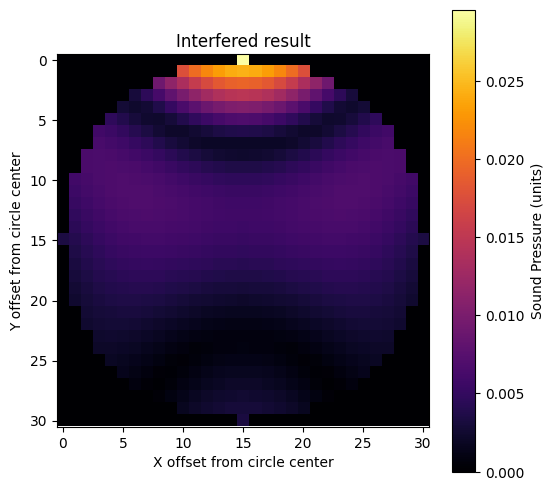

In [34]:
fig, ax = plt.subplots(figsize=(6, 6))

# cax = ax.imshow(np.abs(no_int_15 + np.flip(no_int_inverted_15, axis=1)), cmap='inferno', interpolation='nearest')
cax = ax.imshow(np.abs(result), cmap='inferno', interpolation='nearest')
ax.set_title('Interfered result')
ax.set_xlabel('X offset from circle center')
ax.set_ylabel('Y offset from circle center')

cbar = fig.colorbar(cax, ax=ax)
cbar.set_label('Sound Pressure (units)')

plt.show()

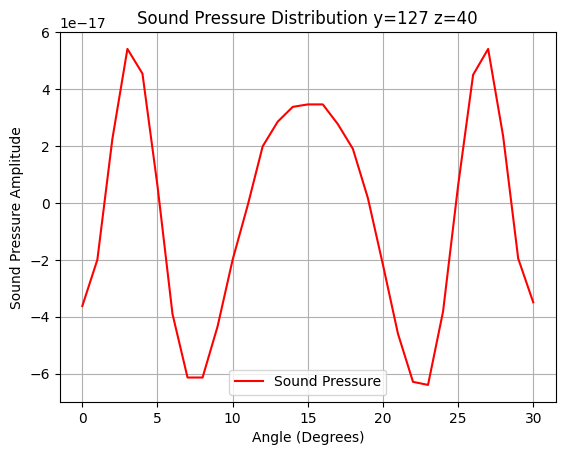

In [22]:
x_axis = np.linspace(0, 30, num=31)

plt.figure()
plt.plot(x_axis, result_cache_15[15][:], 'r-', label='Sound Pressure')
plt.xlabel('Angle (Degrees)')
plt.ylabel('Sound Pressure Amplitude')
plt.title('Sound Pressure Distribution y=127 z=40')
plt.legend()
plt.grid(True)
plt.show()

# 12000hz setup

In [25]:
sound_source12000 = ((105, 128), int(config['sound_source']['z']),
                 3, 
                 12000, 
                 config['sound_source']['type'])

field_exp_12000 = Field(size=(int(config['field']['x_size']), int(config['field']['y_size']), int(config['field']['z_size'])), 
              sound_source=sound_source12000)

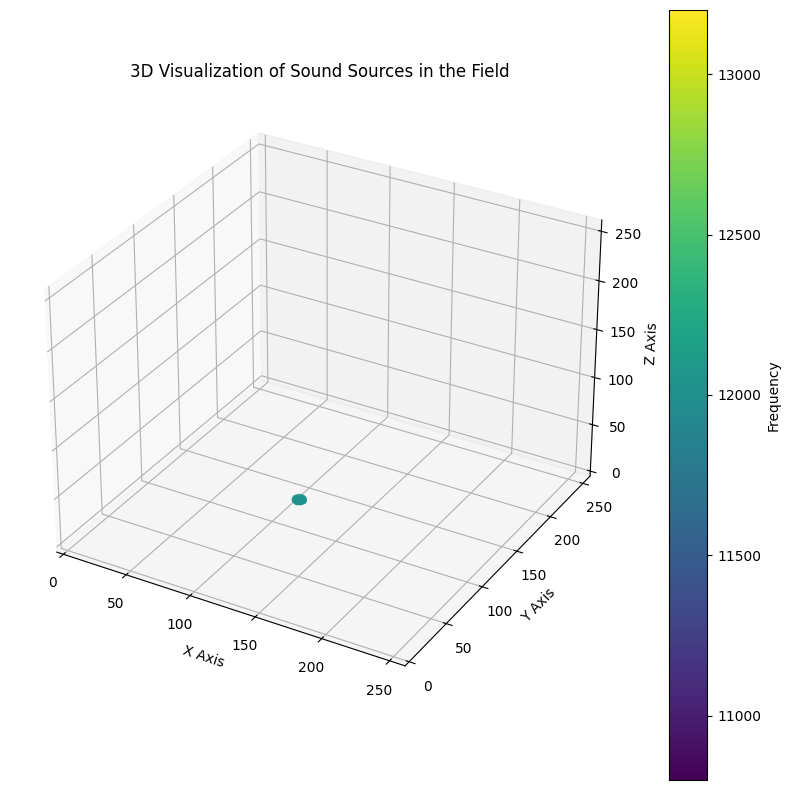

In [26]:
field_exp_12000.show_field()

In [27]:
result_5_12000, result_cache_5_12000, no_int_5_12000, no_int_inverted_5_12000 = field_exp_12000.cal_self_interference(center, 5, space_shape, build_cache)

100%|██████████| 81/81 [00:11<00:00,  7.05it/s]


In [28]:
print(result_5_12000)
print(np.abs(np.sum(result_5_12000)))
no_cancel_result_5_12000 = np.sum(no_int_5_12000)
print(no_cancel_result_5_12000)
print(np.abs(no_cancel_result_5_12000))

(-7.394085344003543e-14-1.2707543350920503e-13j)
1.4702182017983995e-13
(-0.3846165985217005+0.22383446290377101j)
0.445007634363527


In [29]:
result_15_12000, result_cache_15_12000, no_int_15_12000, no_int_inverted_15_12000 = field_exp_12000.cal_self_interference(center, 15, space_shape, build_cache=True)

100%|██████████| 709/709 [01:40<00:00,  7.05it/s]


In [30]:
print(result_15_12000)
print(np.abs(np.sum(result_15_12000)))
no_cancel_result_15_12000 = np.sum(no_int_15_12000)
print(no_cancel_result_15_12000)
print(np.abs(no_cancel_result_15_12000))

(-5.542233338928781e-13+4.418687638008123e-14j)
5.559819995967183e-13
(0.13340381730102724+1.6765867992609031j)
1.6818858088248456


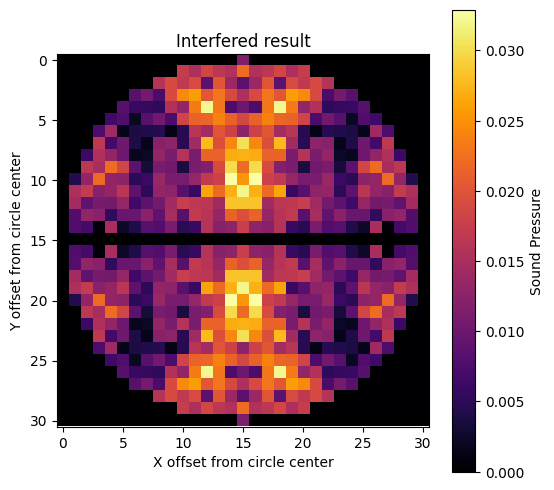

In [49]:
fig, ax = plt.subplots(figsize=(6, 6))

# cax = ax.imshow(np.abs(result_cache_15_12000), cmap='inferno', interpolation='nearest')
cax = ax.imshow(np.abs(result_cache_15_12000), cmap='inferno', interpolation='nearest')
ax.set_title('Interfered result')
ax.set_xlabel('X offset from circle center')
ax.set_ylabel('Y offset from circle center')

cbar = fig.colorbar(cax, ax=ax)
cbar.set_label('Sound Pressure')

plt.show()

In [40]:
print(np.abs(np.sum(result_15_12000[10:15][10:21])))

IndexError: invalid index to scalar variable.

# Plot cancellation result w.r.t different frequencies with an observer of radius 3

In [52]:
lower = 50
upper = 20050
step = 100

result_freqs = np.zeros(int((upper-lower)/step)+1, dtype=complex)
cancellation_ratios_freqs = np.zeros(int((upper-lower)/step)+1, dtype=complex)

In [53]:
for freq in tqdm(range(lower, upper+1, step)):
    sound_source_curr = ((105, 128), int(config['sound_source']['z']),
                 5, 
                 freq, 
                 config['sound_source']['type'])

    field_curr_freq = Field(size=(int(config['field']['x_size']), int(config['field']['y_size']), int(config['field']['z_size'])), sound_source=sound_source_curr)
    curr_result, _, curr_ratio = field_curr_freq.cal_cancellation(center, 3)
    result_freqs[int(freq/step)-1] = curr_result
    cancellation_ratios_freqs[int(freq/step)-1] = curr_ratio

100%|██████████| 201/201 [13:55<00:00,  4.16s/it]


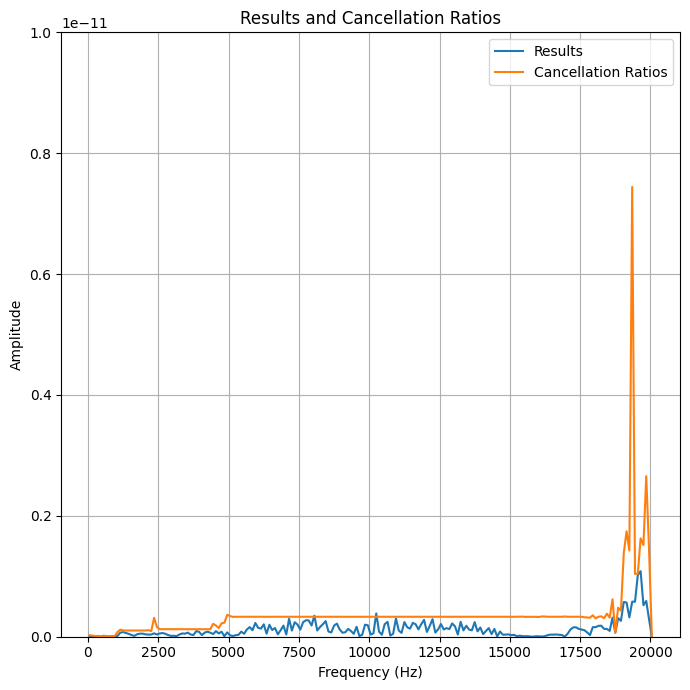

In [56]:
# Assuming that the required calculations and variables have been previously defined correctly,
# here is the plotting part:

# Define the frequency range based on the given parameters
frequencies = np.arange(lower, upper + 1, step)

# Plotting the results
# Since the results are complex, we will plot both the real and imaginary parts

plt.figure(figsize=(7, 7))

plt.plot(frequencies, np.abs(result_freqs), label='Results')
plt.plot(frequencies, np.abs(cancellation_ratios_freqs), label='Cancellation Ratios')
plt.title('Results and Cancellation Ratios')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.ylim(0, 10e-12)

plt.tight_layout()
plt.show()


# 1200hz

In [9]:
sound_source1200 = ((105, 128), int(config['sound_source']['z']),
                 3, 
                 1200, 
                 config['sound_source']['type'])

field_exp_1200 = Field(size=(int(config['field']['x_size']), int(config['field']['y_size']), int(config['field']['z_size'])), 
              sound_source=sound_source1200)

In [10]:
result_15_1200, result_cache_15_1200, no_int_15_1200, no_int_inverted_15_1200 = field_exp_1200.cal_self_interference(center, 15, space_shape, build_cache)

100%|██████████| 709/709 [02:08<00:00,  5.51it/s]


In [72]:
print(result_15_1200)
print(np.abs(np.sum(result_15_1200)))
no_cancel_result_15_1200 = np.sum(no_int_15_1200)
print(no_cancel_result_15_1200)
print(np.abs(no_cancel_result_15_1200))

(2.220446049250313e-14+9.914291609902648e-14j)
1.0159899545951099e-13
(0.6763639535257864-1.075358465954128j)
1.270379481858963


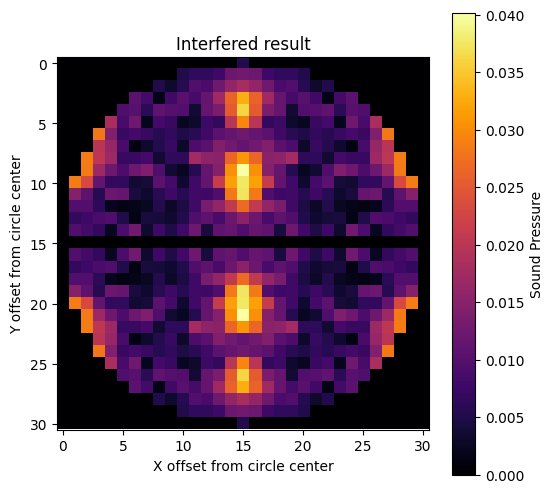

In [61]:
fig, ax = plt.subplots(figsize=(6, 6))

# cax = ax.imshow(np.abs(result_cache_15_12000), cmap='inferno', interpolation='nearest')
cax = ax.imshow(np.abs(result_cache_15_1200), cmap='inferno', interpolation='nearest')
ax.set_title('Interfered result')
ax.set_xlabel('X offset from circle center')
ax.set_ylabel('Y offset from circle center')

cbar = fig.colorbar(cax, ax=ax)
cbar.set_label('Sound Pressure')

plt.show()

In [71]:
shifted_interference = np.abs(np.sum(result_cache_15_1200[7:10, 14: 17]))
print(shifted_interference)

0.2188454604169452


In [6]:
def cal_observed_result(freq, center, space_shape):
    sound_source = ((105, 128), int(config['sound_source']['z']),
                 3, 
                 freq, 
                 config['sound_source']['type'])
    field_exp = Field(size=(int(config['field']['x_size']), int(config['field']['y_size']), int(config['field']['z_size'])), 
                  sound_source=sound_source)
    result_15, result_cache_15, no_int_15, no_int_inverted_15 = field_exp.cal_self_interference(center, 15, space_shape)
    
    fig, ax = plt.subplots(figsize=(6, 6))

    # cax = ax.imshow(np.abs(result_cache_15_12000), cmap='inferno', interpolation='nearest')
    cax = ax.imshow(np.abs(result_cache_15), cmap='inferno', interpolation='nearest')
    ax.set_title('Interfered result')
    ax.set_xlabel('X offset from circle center')
    ax.set_ylabel('Y offset from circle center')
    
    cbar = fig.colorbar(cax, ax=ax)
    cbar.set_label('Sound Pressure')
    
    plt.show()
    return result_15, result_cache_15, no_int_15, no_int_inverted_15

100%|██████████| 709/709 [02:09<00:00,  5.48it/s]


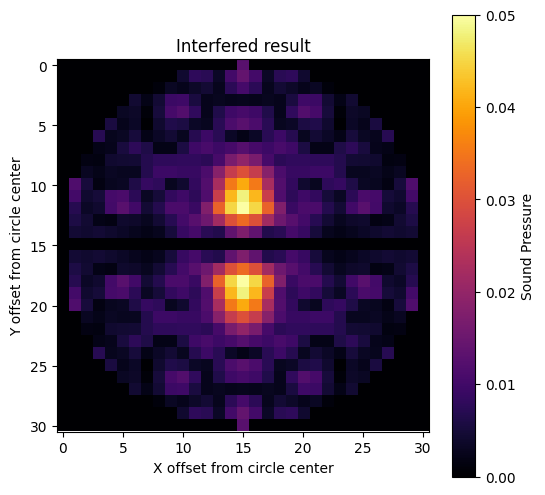

In [7]:
result_15_800, result_cache_15_800, no_int_15_800, no_int_inverted_15_800 = cal_observed_result(800, center, space_shape)

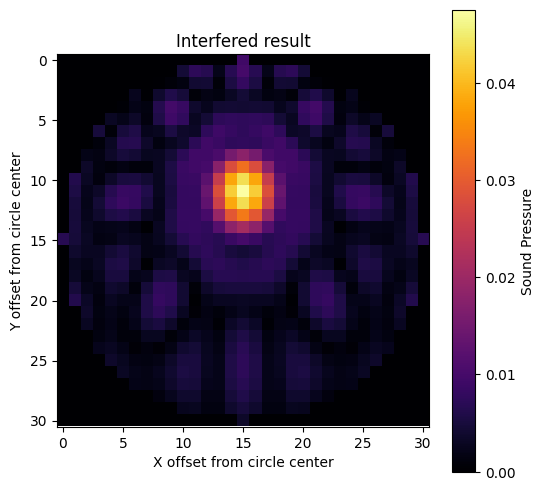

In [8]:
fig, ax = plt.subplots(figsize=(6, 6))

# cax = ax.imshow(np.abs(result_cache_15_12000), cmap='inferno', interpolation='nearest')
cax = ax.imshow(np.abs(no_int_15_800), cmap='inferno', interpolation='nearest')
ax.set_title('Interfered result')
ax.set_xlabel('X offset from circle center')
ax.set_ylabel('Y offset from circle center')

cbar = fig.colorbar(cax, ax=ax)
cbar.set_label('Sound Pressure')

plt.show()